# Movie Recommendation System
Simply put a Recommendation System is a filtration program whose prime goal is to predict the “rating” or “preference” of a user towards a domain-specific item or item. In our case, this domain-specific item is a movie, therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

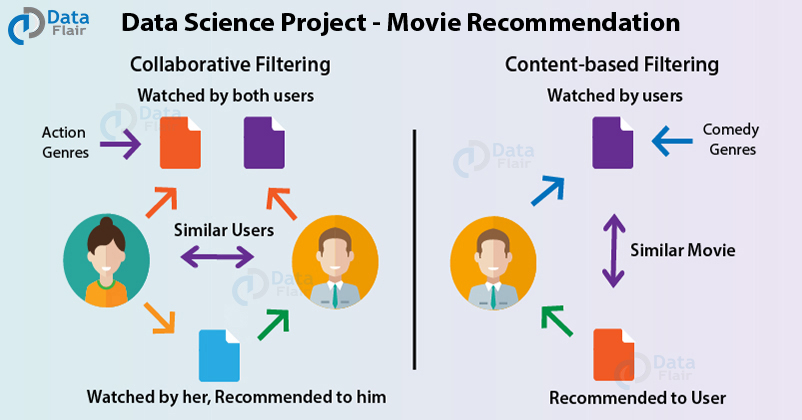

## Types of recommendation system
## 1->Collaborative based filtering
This filtration strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm. The main difference between content-based filtering and collaborative filtering that in the latter, the interaction of all users with the items influences the recommendation algorithm while for content-based filtering only the concerned user’s data is taken into account.
There are multiple ways to implement collaborative filtering but the main concept to be grasped is that in collaborative filtering multiple user’s data influences the outcome of the recommendation. and doesn’t depend on only one user’s data for modeling.

## 2->Content based filtering
The concept in this case is to find similar movies instead of similar users and then recommending similar movies to that ‘A’ has had in his/her past preferences. This is executed by finding every pair of items that were rated/viewed/liked/clicked by the same user, then measuring the similarity of those rated/viewed/liked/clicked across all user who rated/viewed/liked/clicked both, and finally recommending them based on similarity scores.

Here, for example, we take 2 movies ‘A’ and ‘B’ and check their ratings by all users who have rated both the movies and based on the similarity of these ratings, and based on this rating similarity by users who have rated both we find similar movies. So if most common users have rated ‘A’ and ‘B’ both similarly and it is highly probable that ‘A’ and ‘B’ are similar, therefore if someone has watched and liked ‘A’ they should be recommended ‘B’ and vice versa.

## <u><b>Importing Libraries<b><u>
### pandas for manipulating dataframe
### numpy for performing mathematical operations
### sparse for using CSR matrix
### NearestNeighbours is the final training algorithm
### matplotlib and seaborn are for plotting data

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix #CSR ->Compressed Sparse Row
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## <u>Importing datasets<u>
### movies consists of : Movie title and Genres
### rating consists of: Rating given by other users

In [ ]:
movies = pd.read_csv("../input/movie-lens-small-latest-dataset/movies.csv")
ratings = pd.read_csv("../input/movie-lens-small-latest-dataset/ratings.csv")

In [ ]:
movies.head()

In [ ]:
ratings.head()

In [ ]:
ratings.shape

In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

In [ ]:
csr_sample = csr_matrix(sample)
print(csr_sample)

In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

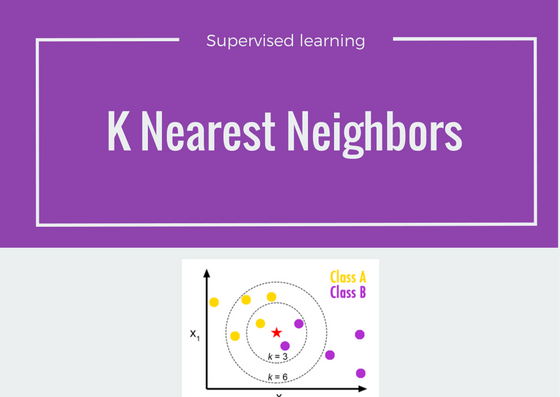

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1) 
knn.fit(csr_data)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Iron Man')

In [ ]:
get_movie_recommendation('Memento')